# How to assess uncertainty in regression coefficients?

Load packages we will use

In [1]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Regression coefficients are random

/Users/udell/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([-0.09473637,  0.15347144])

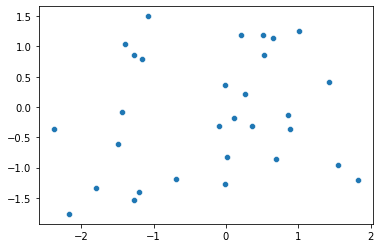

In [13]:
# generate random data
cor = .3
alpha = cor**2
n = 30
x = np.random.randn(n)
y = np.sqrt(1-alpha) * np.random.randn(n) + np.sqrt(alpha) * np.sign(cor) * x
sns.scatterplot(x, y)

# estimate of beta is different every time 
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
model.params

In [17]:
# visualize the uncertainty in the estimate of beta
m = 100
params = np.zeros((m, 2))
for trial in range(m):
    cor = .3
    alpha = cor**2
    n = 30
    x = np.random.randn(n)
    y = np.sqrt(1-alpha) * np.random.randn(n) + np.sqrt(alpha) * np.sign(cor) * x

    # estimate of beta is different every time 
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    params[trial, :] = model.params

<AxesSubplot:ylabel='Count'>

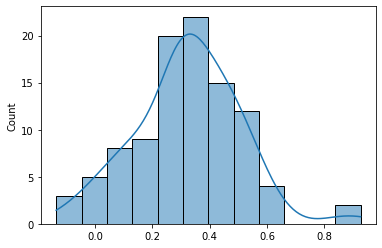

In [19]:
# plot the uncertainty in the estimate of beta
sns.histplot(params[:, 1], kde=True)

# how to estimate uncertainty in the estimate of beta in practice?

* use a bootstrap to estimate the uncertainty in the estimate of beta
* use the normal model to derive a formula for the uncertainty

In [37]:
# model summary uses the normal model to compute std err, and associated confidence interval and p value
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.068
Date:                Wed, 15 Mar 2023   Prob (F-statistic):             0.0908
Time:                        12:34:42   Log-Likelihood:                -35.037
No. Observations:                  30   AIC:                             74.07
Df Residuals:                      28   BIC:                             76.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2130      0.157     -1.354      0.187      -0.535       0.109
x1             0.2306      0.132      1.752      0.091      -0.039       0.500
==============================================================================
Omnibus:                        3.319   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                1.490
Skew:                           0.114   Prob(JB):                        0.475
Kurtosis:                       1.932   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What do p-values mean?

* p-value is uniform [0,1] if feature x is uncorrelated with outcome y
* p-value is smaller if feature x is correlated with outcome y

try changing the correlation parameter in the code below

In [32]:
model.pvalues

array([0.7707424 , 0.07899949])

In [34]:
# set the correlation between x and y
cor = 0

# visualize the uncertainty in the estimate of beta
m = 1000
pvalues = np.zeros((m, 2))
for trial in range(m):
    alpha = cor**2
    n = 30
    x = np.random.randn(n)
    y = np.sqrt(1-alpha) * np.random.randn(n) + np.sqrt(alpha) * np.sign(cor) * x

    # estimate of beta is different every time 
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    pvalues[trial, :] = model.pvalues

<AxesSubplot:ylabel='Count'>

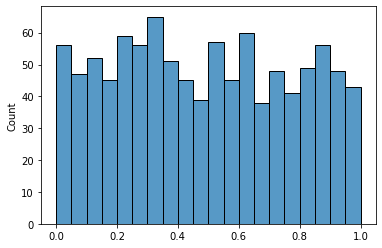

In [35]:
sns.histplot(pvalues[:,1], bins=20)

In [36]:
# around 5% of the pvalues are <.05, just by random chance 
sum(np.array(pvalues) <= .05) / len(pvalues)

array([0.055, 0.056])

# Model selection and p values: be careful!

In [54]:
df = pd.DataFrame()
n = 500
p = 100
for j in range(p):
    xp = 'x'+str(j)
    df[xp] = np.random.randn(n)
y = np.random.randn(n)
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,2.623254,-0.802040,0.054528,0.573241,-0.710244,0.263384,0.463138,0.115483,1.025473,0.101865,...,-0.255342,-1.394777,0.328260,0.810497,-0.899081,-0.081717,2.535730,0.141986,1.472458,-1.118727
1,-1.239898,0.918592,1.607867,0.316869,1.874751,0.843463,-0.878260,0.068491,-0.365059,0.492198,...,1.481027,-1.323337,-0.158361,-0.822766,0.885847,-0.532316,0.463486,-0.069008,-0.625216,-1.073474
2,0.542683,0.039553,1.184619,-0.178273,-1.081759,0.507279,-0.084141,-0.379923,0.552498,-0.243260,...,0.289320,-1.063214,-0.554801,-0.781533,0.638503,-0.673263,-0.599241,-0.640939,-1.222104,-1.537310
3,-0.094054,1.381927,0.153574,1.023250,0.045597,0.103349,-0.032535,0.506236,-1.114935,0.029036,...,0.812528,-0.664168,0.420198,0.433262,-1.624309,0.285201,0.451823,1.204218,-0.014775,-2.143995
4,-0.887388,0.809840,0.236358,1.134181,-0.310011,-1.310849,0.758173,2.401749,-0.895524,-0.564146,...,-1.689074,-0.210007,0.108338,0.867975,1.146043,0.665636,-1.200726,1.710236,-1.253896,-0.001382


In [55]:
variables = df.columns
model = sm.OLS(y,df[variables]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.247
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              1.314
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                      0.0358
Time:                        11:50:03   Log-Likelihood:                         -657.03
No. Observations:                 500   AIC:                                      1514.
Df Residuals:                     400   BIC:                                      1936.
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             0.0370      0.048      0.772      0.441      -0.057       0.131
x1            -0.0050      0.046     -0.109      0.913      -0.095       0.085
x2             0.0580      0.048      1.210      0.227      -0.036       0.152
x3            -0.0524      0.051     -1.021      0.308      -0.153       0.049
x4            -0.0281      0.049     -0.575      0.565      -0.124       0.068
x5            -0.0510      0.051     -0.998      0.319      -0.151       0.049
x6             0.0118      0.048      0.247      0.805      -0.082       0.106
x7             0.1151      0.053      2.159      0.031       0.010       0.220
x8             0.0896      0.049      1.842      0.066      -0.006       0.185
x9             0.0055      0.052      0.108      0.914      -0.096       0.107
x10            0.0225      0.051      0.442      0.658      -0.077       0.122
x11           -0.0968      0.051     -1.889      0.060      -0.198       0.004
x12            0.0328      0.051      0.646      0.519      -0.067       0.133
x13           -0.0364      0.053     -0.687      0.493      -0.141       0.068
x14           -0.0349      0.049     -0.709      0.479      -0.132       0.062
x15            0.0124      0.053      0.236      0.814      -0.091       0.116
x16           -0.0179      0.048     -0.371      0.711      -0.113       0.077
x17           -0.0707      0.051     -1.395      0.164      -0.170       0.029
x18            0.0314      0.051      0.615      0.539      -0.069       0.132
x19            0.0646      0.050      1.294      0.197      -0.034       0.163
x20            0.0120      0.051      0.236      0.814      -0.088       0.112
x21            0.0360      0.051      0.704      0.482      -0.064       0.136
x22           -0.0141      0.050     -0.280      0.780      -0.113       0.085
x23           -0.0211      0.052     -0.405      0.686      -0.124       0.081
x24           -0.0580      0.047     -1.232      0.219      -0.151       0.035
x25           -0.0819      0.051     -1.611      0.108      -0.182       0.018
x26           -0.0464      0.050     -0.919      0.359      -0.146       0.053
x27           -0.0404      0.047     -0.857      0.392      -0.133       0.052
x28           -0.1400      0.048     -2.905      0.004      -0.235      -0.045
x29            0.0075      0.049      0.152      0.879      -0.089       0.104
x30           -0.0691      0.050     -1.374      0.170      -0.168       0.030
x31           -0.0377      0.050     -0.761      0.447      -0.135       0.060
x32           -0.0472      0.050     -0.950      0.343      -0.145       0.050
x33           -0.0776      0.053     -1.451      0.148      -0.183       0.028
x34            0.0392      0.050      0.786      0.432      -

In [56]:
# uncomment this line the first time you run the cell; comment it out for subsequent runs
stat_sig_vars = variables
stat_sig_vars = stat_sig_vars[model.pvalues <= .05]
model = sm.OLS(y,df[stat_sig_vars]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.057
Method:                 Least Squares   F-statistic:                              5.294
Date:                Mon, 13 Mar 2023   Prob (F-statistic):                    7.54e-06
Time:                        11:50:03   Log-Likelihood:                         -709.91
No. Observations:                 500   AIC:                                      1434.
Df Residuals:                     493   BIC:                                      1463.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x7             0.0784      0.047      1.656      0.098      -0.015       0.171
x28           -0.1576      0.044     -3.591      0.000      -0.244      -0.071
x41            0.1123      0.047      2.406      0.016       0.021       0.204
x52            0.1051      0.045      2.317      0.021       0.016       0.194
x62           -0.0843      0.046     -1.843      0.066      -0.174       0.006
x67            0.1131      0.048      2.333      0.020       0.018       0.208
x83           -0.0809      0.046     -1.767      0.078      -0.171       0.009
==============================================================================
Omnibus:                        0.627   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.481
Skew:                          -0.064   Prob(JB):                        0.786
Kurtosis:                       3.082   Cond. No.                         1.26
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""